In [138]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score

In [139]:
car_data = pd.read_csv("car_data.csv", header = 0)
car_data.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [140]:
car_data.shape
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [141]:
# Limpiar los datos
car_data.drop(['User ID'], axis = 1, inplace = True)
car_data['Gender'].replace(['Male', 'Female'],[0, 1], inplace=True)
car_data.head()

,Gender,Age,AnnualSalary,Purchased
0,0,35,20000,0
1,0,40,43500,0
2,0,49,74000,0
3,0,40,107500,1
4,0,25,79000,0


In [142]:
# Obtener la Y de la base de datos
Y = car_data['Purchased']
X = car_data.drop(['Purchased'], axis = 1)

In [143]:
# Normalizar los datos
scaler = StandardScaler()
X_trans = scaler.fit_transform(X)

In [144]:
# Dividir en train y test
x_train, x_test, y_train, y_test = train_test_split(X_trans, Y, test_size = 0.2)

In [145]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 3), (200, 3), (800,), (200,))

## Modelo Inicial

In [146]:
# Crear el modelo con 1 sola capa oculta
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 2, activation = "relu", input_dim = x_train.shape[1]))
model.add(tf.keras.layers.Dense(units = 1, activation = "sigmoid"))

In [147]:
# Compilar el modelo
model.compile(
    optimizer = "sgd",
    loss = "binary_crossentropy",
    metrics = [tf.keras.metrics.BinaryAccuracy()]
)

In [148]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 2)                 8         
                                                                 
 dense_81 (Dense)            (None, 1)                 3         
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [149]:
# Entrenar el modelo
print('Inicio del entrenamiento')
historia = model.fit(x_train, y_train, epochs = 150, verbose = True)
print("Modelo entrenado")

Inicio del entrenamiento
Epoch 1/150
25/25 [==============================] - 0s 1ms/step - loss: 0.5975 - binary_accuracy: 0.6938
Epoch 2/150
25/25 [==============================] - 0s 1ms/step - loss: 0.5824 - binary_accuracy: 0.7100
Epoch 3/150
25/25 [==============================] - 0s 1ms/step - loss: 0.5698 - binary_accuracy: 0.7237
Epoch 4/150
25/25 [==============================] - 0s 1ms/step - loss: 0.5589 - binary_accuracy: 0.7337
Epoch 5/150
25/25 [==============================] - 0s 1ms/step - loss: 0.5489 - binary_accuracy: 0.7412
Epoch 6/150
25/25 [==============================] - 0s 1ms/step - loss: 0.5397 - binary_accuracy: 0.7525
Epoch 7/150
25/25 [==============================] - 0s 976us/step - loss: 0.5315 - binary_accuracy: 0.7663
Epoch 8/150
25/25 [==============================] - 0s 1ms/step - loss: 0.5239 - binary_accuracy: 0.7713
Epoch 9/150
25/25 [==============================] - 0s 1ms/step - loss: 0.5167 - binary_accuracy: 0.7763
Epoch 10/150
25/25 

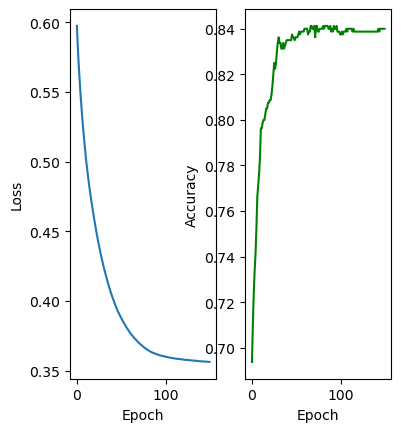

In [150]:
# Graficar la pérdida
plt.subplot(1, 3, 1)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(historia.history["loss"])

# Graficar el accuracy
plt.subplot(1, 3, 2)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(historia.history["binary_accuracy"], color = "green")

plt.show()

## Predicciones

In [151]:
from sklearn.metrics import confusion_matrix,accuracy_score, roc_auc_score
y_hat=model.predict(x_test)
y_hat=[0 if val<0.5 else 1 for val in y_hat]
print("Roc AUC: ", roc_auc_score(y_test,y_hat))
print("Binary Accuracy: ", accuracy_score(y_test,y_hat))

7/7 [==============================] - 0s 1ms/step
Roc AUC:  0.8283106960950762
Binary Accuracy:  0.825


# Mejora de Modelo

In [152]:
# Crear el modelo
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(units = 8, activation = "relu", input_dim = x_train.shape[1]))
model2.add(tf.keras.layers.Dense(units = 4, activation = "relu"))
model2.add(tf.keras.layers.Dense(units = 2, activation = "relu"))
model2.add(tf.keras.layers.Dense(units = 1, activation = "sigmoid"))

In [153]:
# Compilar el modelo
model2.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = [tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.AUC()]
)

In [154]:
# Entrenar el modelo
print('Inicio del entrenamiento')
historia = model2.fit(X_trans, Y, epochs = 300, verbose = True, validation_split = 0.2)
print("Modelo entrenado")

Inicio del entrenamiento
Epoch 1/300
25/25 [==============================] - 1s 10ms/step - loss: 0.6782 - binary_accuracy: 0.5962 - auc_19: 0.7931 - val_loss: 0.6738 - val_binary_accuracy: 0.6050 - val_auc_19: 0.8133
Epoch 2/300
25/25 [==============================] - 0s 2ms/step - loss: 0.6692 - binary_accuracy: 0.5962 - auc_19: 0.8316 - val_loss: 0.6639 - val_binary_accuracy: 0.6050 - val_auc_19: 0.8268
Epoch 3/300
25/25 [==============================] - 0s 2ms/step - loss: 0.6563 - binary_accuracy: 0.5962 - auc_19: 0.8663 - val_loss: 0.6500 - val_binary_accuracy: 0.6050 - val_auc_19: 0.8536
Epoch 4/300
25/25 [==============================] - 0s 3ms/step - loss: 0.6389 - binary_accuracy: 0.5962 - auc_19: 0.8981 - val_loss: 0.6301 - val_binary_accuracy: 0.6050 - val_auc_19: 0.8725
Epoch 5/300
25/25 [==============================] - 0s 3ms/step - loss: 0.6174 - binary_accuracy: 0.5962 - auc_19: 0.9145 - val_loss: 0.6089 - val_binary_accuracy: 0.6050 - val_auc_19: 0.8931
Epoch 6/3

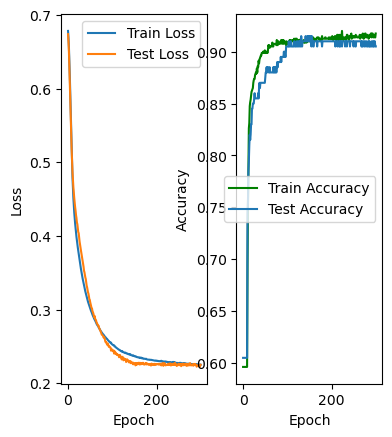

In [155]:
# Graficar la pérdida
plt.subplot(1, 3, 1)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(historia.history["loss"], label='Train Loss')
plt.plot(historia.history["val_loss"], label='Test Loss')
plt.legend()

# Graficar el accuracy
plt.subplot(1, 3, 2)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(historia.history["binary_accuracy"], color = "green", label='Train Accuracy')
plt.plot(historia.history["val_binary_accuracy"], label='Test Accuracy')

plt.legend()
plt.show()


## Predicciones

In [156]:
y_hat=model2.predict(x_test)
y_hat=[0 if val<0.5 else 1 for val in y_hat]
print("Roc AUC: ", roc_auc_score(y_test,y_hat))
print("Binary Accuracy: ", accuracy_score(y_test,y_hat))

7/7 [==============================] - 0s 1ms/step
Roc AUC:  0.9176570458404074
Binary Accuracy:  0.92
